In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

%matplotlib inline
matplotlib.rcParams['axes.unicode_minus'] = False

## サンプルデータセット

X.shape: (26, 2)


C:\Users\PC-USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


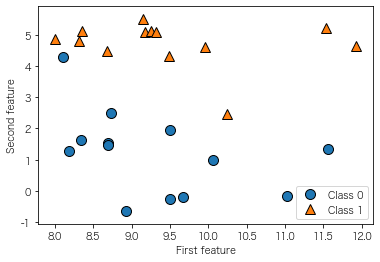

In [2]:
X, y = mglearn.datasets.make_forge()

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print(f"X.shape: {X.shape}")

Text(0, 0.5, 'Target')

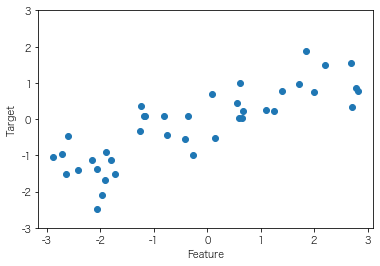

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(f"cancer.keys(): \n{cancer.keys()}")

cancer.keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [5]:
print(f"Shape of cancer data: \n{cancer.data.shape}")

Shape of cancer data: 
(569, 30)


In [6]:
print(f"Sample counts pre class: \n{ {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))} }")

Sample counts pre class: 
{'malignant': 212, 'benign': 357}


In [7]:
print(f"Feature names:\n{cancer.feature_names}")

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [61]:
from sklearn.datasets import load_boston
# boston = load_boston()
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
boston = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

print(f"Data shape: {boston.data.shape}")

Data shape: (506, 13)


In [64]:
# load_extended_boston
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

def extended_boston():
    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    boston = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    y = raw_df.values[1::2, 2]
    X = boston.data

    X = MinMaxScaler().fit_transform(boston.data)
    X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
    return X, y

X, y = extended_boston()
print(f"{X.shape=}")


X.shape=(506, 104)


## 2.3.2 k-最近傍法

C:\Users\PC-USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


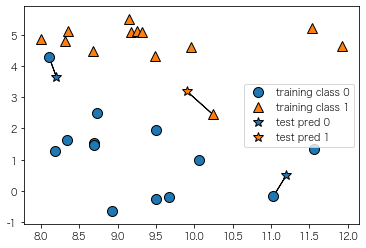

In [9]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

C:\Users\PC-USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


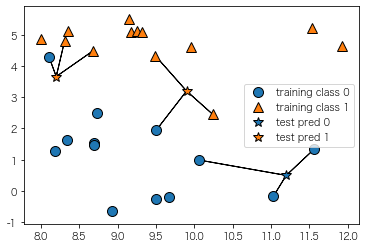

In [10]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [11]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

C:\Users\PC-USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [12]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [13]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [14]:
print(f"Test set predictions: {clf.predict(X_test)}")

Test set predictions: [1 0 1 0 1 0 0]


In [15]:
print(f"Test set accuracy: {clf.score(X_test, y_test):.2f}")

Test set accuracy: 0.86


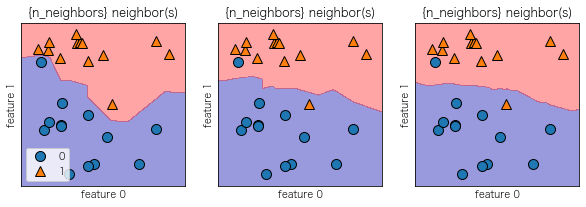

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{n_neighbors} neighbor(s)")
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

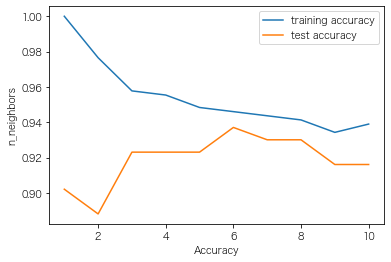

In [17]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target,stratify=cancer.target, random_state=66
)

training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.xlabel("Accuracy")
plt.ylabel("n_neighbors")
plt.legend()

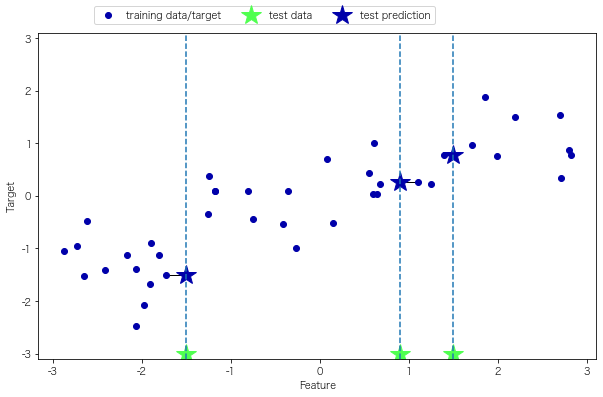

In [18]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

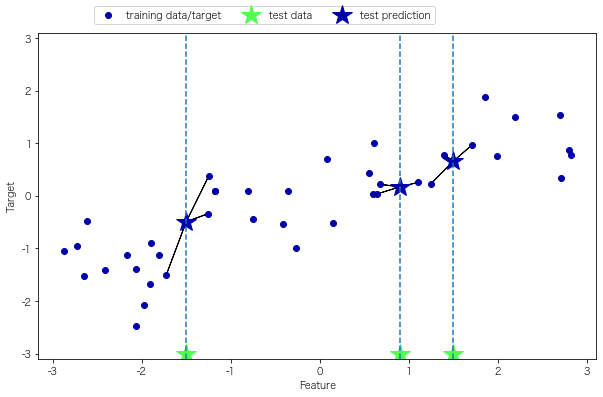

In [19]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [20]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [21]:
print(f"Test set predictions: \n{reg.predict(X_test)}")

Test set predictions: 
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [22]:
print(f"Test set R^2: {reg.score(X_test, y_test):.2f}")

Test set R^2: 0.83


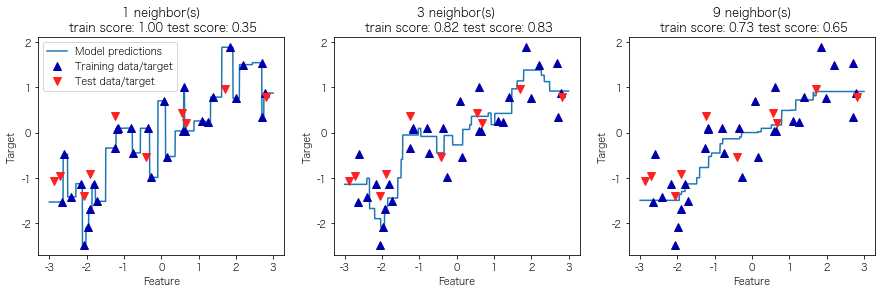

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(f"{n_neighbors} neighbor(s)\n train score: {reg.score(X_train, y_train):.2f} test score: {reg.score(X_test, y_test):.2f}")
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")

axes[0].legend(["Model predictions", "Training data/target", "Test data/target"], loc="best")

## 2.3.3 線形モデル

w[0]: 0.393906  b: -0.031804


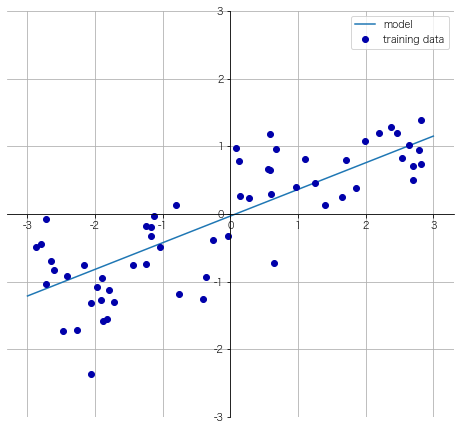

In [24]:
mglearn.plots.plot_linear_regression_wave()

In [25]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [30]:
print(f"{lr.coef_=}")
print(f"{lr.intercept_=}")

lr.coef_=array([0.39390555])
lr.intercept_=-0.031804343026759746


In [34]:
print(f"Training set score: {lr.score(X_train, y_train):.2f}")
print(f"Test set score: {lr.score(X_test, y_test):.2f}")

Training set score: 0.67
Test set score: 0.66


In [65]:
X, y = extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [66]:
print(f"Training set score: {lr.score(X_train, y_train):.2f}")
print(f"Test set score: {lr.score(X_test, y_test):.2f}")

Training set score: 0.95
Test set score: 0.61


In [67]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print(f"Training set score: {ridge.score(X_train, y_train):.2f}")
print(f"Test set score: {ridge.score(X_test, y_test):.2f}")

Training set score: 0.89
Test set score: 0.75


In [69]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print(f"Training set score: {ridge10.score(X_train, y_train):.2f}")
print(f"Test set score: {ridge10.score(X_test, y_test):.2f}")


Training set score: 0.79
Test set score: 0.64


In [86]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print(f"Training set score: {ridge01.score(X_train, y_train):.2f}")
print(f"Test set score: {ridge01.score(X_test, y_test):.2f}")

Training set score: 0.93
Test set score: 0.77


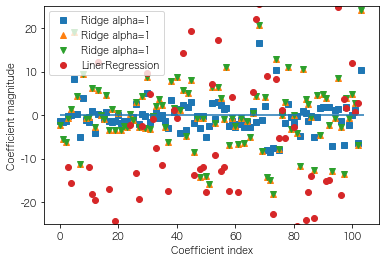

In [88]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=1")

plt.plot(lr.coef_, 'o', label="LinerRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

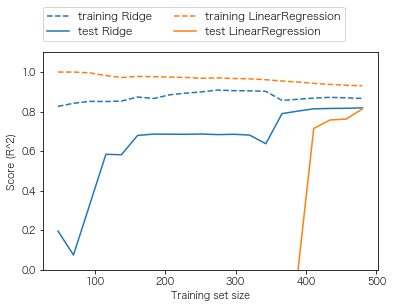

In [92]:
X, y = extended_boston()

mglearn.plot_ridge.plot_learning_curve(Ridge(alpha=1), X, y)
mglearn.plot_ridge.plot_learning_curve(LinearRegression(), X, y)
plt.legend(loc=(0, 1.05), ncol=2, fontsize=11)
